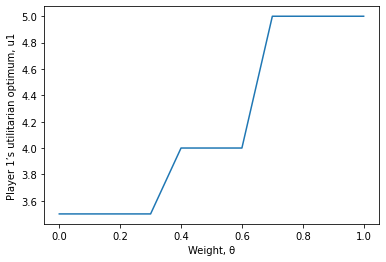

In [11]:
import cvxpy as cp
import matplotlib.pyplot as plt

d = [3.5, 2]
u1 = cp.Variable()
u2 = cp.Variable()
theta = cp.Parameter(nonneg=True)

constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= d[0], u2 >= d[1]]
weighted = cp.Maximize(theta*u1 + (1-theta)*u2)
problem = cp.Problem(weighted, constraints)

utilitarian = []

for i in range(11):
    theta.value = i/10
    problem.solve()
    utilitarian.append(u1.value)

plt.plot([i/10 for i in range(11)], utilitarian)
plt.xlabel('Weight, θ')
plt.ylabel('Player 1’s utilitarian optimum, u1')
plt.show()

Nash bargaining Solution: (4.249999934669844, 3.5000001072596256)
Primal Optimal Value:  0.11778302005591901
Optimal Dual Variables:  3.6170408140313444e-09 0.6666667548200322 3.202879721090295e-09 1.5363574774749631e-09


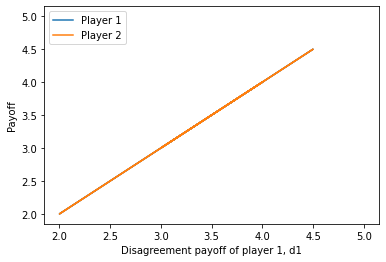

In [12]:
import cvxpy as cp
import matplotlib.pyplot as plt

d = [3.5, 2]
u1 = cp.Variable()
u2 = cp.Variable()

constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= d[0], u2 >= d[1]]
welfare = cp.Maximize(cp.log(u1 - d[0]) + cp.log(u2 - d[1]))
problem = cp.Problem(welfare, constraints)

nash = []

problem.solve()

print("Nash bargaining Solution: ({}, {})".format(u1.value, u2.value))
print("Primal Optimal Value: ", problem.value)
print("Optimal Dual Variables: ", constraints[0].dual_value, constraints[1].dual_value, constraints[2].dual_value, constraints[3].dual_value)

d[1] = 2
u1_vals = u2_vals = d1_vals = []

for d1 in range(2, 6):
    constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= d1, u2 >= 2]

    welfare = cp.Maximize(cp.log(u1 - d1) + cp.log(u2 - 2))
    problem = cp.Problem(welfare, constraints)
    problem.solve()
    
    u1_vals.append(u1.value), u2_vals.append(u2.value), d1_vals.append(d1)

plt.plot(d1_vals, u1_vals, label="Player 1")
plt.plot(d1_vals, u2_vals, label="Player 2")
plt.xlabel("Disagreement payoff of player 1, d1")
plt.ylabel("Payoff")
plt.legend()
plt.show()

min tf0(x) + B(x)
x∈Rn 

In [13]:
import numdifftools as nd
import numpy as np
import matplotlib.pyplot as plt

def B(x):
    return np.sum(-np.log(-f(x)))

def central_point(x, t):
    return t*f(x) + B(x)

def lineSearchSubroutine(f, x, d, beta=0.5, alpha=0.5):
    t = 1
    while f(x) - f(x + t * d) < -t*alpha*np.dot(nd.Gradient(f)(x), d): 
        t = beta*t
    return t

def newton(x, f, tolerance):
    gradient = nd.Gradient(f)(x)
    while np.linalg.norm(gradient) > tolerance:
        hessian = nd.Hessian(f)(x)
        d = -np.linalg.inv(hessian)@gradient
        t = lineSearchSubroutine(f, x, d)
        x = x + t*d
        gradient = nd.Gradient(f)(x)
    return x

def interior_point(x0, t0, mu, eta, max_iter, f, c, d):
    x = x0
    t = t0
    m = len(c)
    while (m/t > eta):
        t = mu*t
        cen = newton(x, central_point(x, t), 1e-6)
        x = cen
    return x